# An introduction to Turing 

[Turing](https://github.com/yebai/Turing.jl) is a general-purpose probabilistic programming system in Julia. Here we describe how to run a very simple Turing program. 
A *probabilistic program* is Julia code wrapped in a `@model` macro. It can use arbitrary Julia code, but to ensure correctness of inference it should not have external effects or modify global state. You can create your own `@model` using any distribution within the Distributions package. The list of such distributions supported is comprehensive: 
https://juliastats.github.io/Distributions.jl/latest/

In [2]:
# Load packages
using Turing, Distributions
using Gadfly

## A simple Gaussian model

In [3]:
@model gdemo(x) = begin
  s ~ InverseGamma(2,3)
  m ~ Normal(0,sqrt(s))
  x[1] ~ Normal(m, sqrt(s))
  x[2] ~ Normal(m, sqrt(s))
  return s, m
end

gdemo (generic function with 2 methods)

## Inference by Markov Chain Monte Carlo

In [ ]:
c = sample(gdemo([1.5, 2]), PG(50,300));

In [5]:
# Describe the result.
describe(c)

Iterations = 1:300
Thinning interval = 1
Chains = 1
Samples per chain = 300

Empirical Posterior Estimates:
            Mean         SD      Naive SE       MCSE        ESS   
      m 1.2092403901 0.7186819 0.0414931171 0.0397558537 300.00000
     lp 0.0000000000 0.0000000 0.0000000000 0.0000000000 300.00000
elapsed 0.0102881850 0.0796228 0.0045970244 0.0051878372 235.56035
      s 2.0268531065 1.6305453 0.0941395779 0.0663641517 300.00000

Quantiles:
            2.5%        25.0%       50.0%       75.0%       97.5%   
      m -0.368943076 0.78907267 1.2276737317 1.601042083 2.708035915
     lp  0.000000000 0.00000000 0.0000000000 0.000000000 0.000000000
elapsed  0.004343597 0.00469305 0.0049033265 0.005160703 0.009337271
      s  0.581127864 1.09125191 1.6000530680 2.456618263 5.140027418



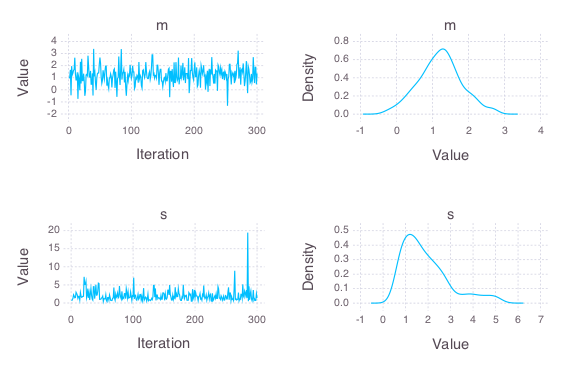

In [40]:
p1 = plot(c);  draw(PNG(15cm, 10cm), gridstack([p1[1] p1[2]; p1[7] p1[8]]));

In [ ]:
c2 = sample(gdemo([1.5, 2]), HMC(1000, 0.3, 10));

In [9]:
describe(c2)

Iterations = 1:1000
Thinning interval = 1
Chains = 1
Samples per chain = 1000

Empirical Posterior Estimates:
             Mean                SD                     Naive SE                     MCSE                ESS   
      m  1.2080322036 0.7814125364678283780506 0.024710434074477226340516 0.032413174523771605406441  581.18930
     lp -5.7548222301 1.1501082571958338718332 0.036369616485055739074639 0.096137267222895478324673  143.11788
 lf_num  9.9900000000 0.3162277660168392734441 0.010000000000000041841530 0.009999999999999965513697 1000.00000
elapsed  0.0037511152 0.0540517682327622747684 0.001709266991750630270905 0.001879716220643379244112  826.86619
      s  2.1477064546 2.5688636945203429107210 0.081234602731992885948920 0.156686416170530806724059  268.79391
epsilon  0.3000000000 0.0000000000000013329343 0.000000000000000042151082 0.000000000000000018503717 1000.00000

Quantiles:
             2.5%         25.0%         50.0%         75.0%         97.5%    
      m -0.31656

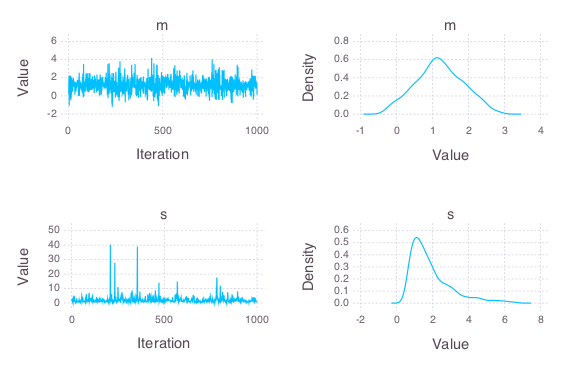

In [41]:
p2 = plot(c2);  draw(PNG(15cm, 10cm), gridstack([p2[1] p2[2]; p2[9] p2[10]]));